# Модули

In [43]:
import pandas as pd
import pyreadstat #Для чтения файлов SPSS
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
#Нам нужен упорядоченный словарь для системы уравнений
from collections import OrderedDict
#Для оценки систем одновременных уравнений
from linearmodels.system import SUR
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.ticker as ticker
from sympy import *
import patsy
import numpy as np

In [44]:
#Задействованные модули
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Загрузка данных
Эта и предыдущая главы должны быть в дао=льнейшем преобразованы в Python package

In [45]:
waves_dict={1994:[5,'A'],
           1995:[6,'B'],
           1996:[7,'C'],
           1998:[8,'D'],
           2000:[9,'E'],
           2001:[10,'F'],
           2002:[11,'G'],
           2003:[12,'H'],
           2004:[13,'I'],
           2005:[14,'J'],
           2006:[15,'K'],
           2007:[16,'L'],
           2008:[17,'M'],
           2009:[18,'N'],
           2010:[19,'O'],
           2011:[20,'P'],
           2012:[21,'Q'],
           2013:[22,'R'],
           2014:[23,'S'],
           2015:[24,'T'],
           2016:[25,'U'],
           2017:[26,'V'],
           2018:[27,'W'],
           2019:[28,'X'],
           2020:[29,'Y'],
           2021:[30,'Z'] 
           }

In [46]:
# Загрузка фрейма данных волны выбранного года из папки
def download_wave_ind(year,path=r'C:\Users\79618\Desktop\Saved\Репрезентативная выборка 06.09.2022'):
    if (year<1994) or (year==1997) or (year==1999):
        print('Волны {0} года не существует.'.format(year))
    else:
        filename=os.listdir(r'{0}\{1}-я волна\ИНДИВИДЫ'.format(path,waves_dict[year][0]))[0]
        return pd.read_spss(r'{0}\{1}-я волна\ИНДИВИДЫ\{2}'.format(path,waves_dict[year][0],filename))

In [47]:
# Загрузка в словарь нескольких волн исследования
def download_period_ind(period,path):
    dict_ind_period={}
    for i in period:
        if (i<1994) or (i==1997) or (i==1999):
            print('Волны {0} года не существует.'.format(i))
            continue
        dict_ind_period[i]=download_wave_ind(i,path)
        print('Загружен ',i)
    return dict_ind_period

In [48]:
# Загрузка данных для работы FAST-функций
def FAST_variable_ind(path):
    global FAST_INDS_DFS
    FAST_INDS_DFS=download_period_ind(list(range(1993,2022)),path=path)

In [49]:
FAST_variable_ind(path=r'C:\Users\79618\Desktop\Saved\Репрезентативная выборка 06.09.2022')

Волны 1993 года не существует.
Загружен  1994
Загружен  1995
Загружен  1996
Волны 1997 года не существует.
Загружен  1998
Волны 1999 года не существует.
Загружен  2000
Загружен  2001
Загружен  2002
Загружен  2003
Загружен  2004
Загружен  2005
Загружен  2006
Загружен  2007
Загружен  2008
Загружен  2009
Загружен  2010
Загружен  2011
Загружен  2012
Загружен  2013
Загружен  2014
Загружен  2015
Загружен  2016
Загружен  2017
Загружен  2018
Загружен  2019
Загружен  2020
Загружен  2021


# Отбор политически релевантных переменных
Возможно будет оптимальнее загрузить данные RLMS-HSE и Codebook на облако, чтобы любой пользователь мог оттуда ее выгрузить без нужды ручной работы по загрузке данных с сайта ВШЭ, который требует авторизации. 

In [7]:
import pandas as pd
codebook=pd.read_spss(r'C:\Users\79618\Desktop\Saved\Codebook_БД_ind_USER_1994_2021.sav')

In [8]:
codebook.loc[codebook.variable_labels!=''].head(5)

,name,variable_labels,all_year,code_value_labels,value_labels,R5_A_1994,R6_B_1995,R7_C_1996,R8_D_1998,R9_E_2000,...,R21_Q_2012,R22_R_2013,R23_S_2014,R24_T_2015,R25_U_2016,R26_V_2017,R27_W_2018,R28_X_2019,R29_Y_2020,R30_Z_2021
0,id_w,НОМЕР ВОЛНЫ,,5,1994 год,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,idind,Единый идентификационный номер индивида для во...,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
27,year,ГОД ПРОВЕДЕНИЯ ИССЛЕДОВАНИЯ,,,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,redid_i,НОМЕР ИНДИВИДА - СПЛОШНАЯ НУМЕРАЦИЯ,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
29,id_i,НОМЕР ИНДИВИДА - ИДЕНТИФИКАЦИОННЫЙ - УНИКАЛЬНЫ...,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
# Не воспроизводить
for i in codebook.name.index:
    if codebook.name[i]!='':
        print(i,codebook.name[i],codebook.variable_labels[i])
        print()

0 id_w НОМЕР ВОЛНЫ

26 idind Единый идентификационный номер индивида для волн 5 и последующих

27 year ГОД ПРОВЕДЕНИЯ ИССЛЕДОВАНИЯ

28 redid_i НОМЕР ИНДИВИДА - СПЛОШНАЯ НУМЕРАЦИЯ

29 id_i НОМЕР ИНДИВИДА - ИДЕНТИФИКАЦИОННЫЙ - УНИКАЛЬНЫЙ ВНУТРИ ВОЛНЫ

30 id_h НОМЕР ДОМОХОЗЯЙСТВА - ИДЕНТИФИКАЦИОННЫЙ - УНИКАЛЬНЫЙ ВНУТРИ ВОЛНЫ

31 origsm АДРЕС РЕПРЕЗЕНТАТИВНОЙ ВЫБОРКИ

33 inwgt Постстратификационный вес для данного индивида

34 region Регион

75 psu ПЕРВИЧНАЯ ЕДИНИЦА ОТБОРА

113 status ТИП НАСЕЛЕННОГО ПУНКТА

117 popul ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ

118 int_y ГОД ПРОВЕДЕНИЯ ИНТЕРВЬЮ

119 adult Есть взрослый вопросник?

121 child Есть детский вопросник?

123 marst СЕМЕЙНОЕ ПОЛОЖЕНИЕ В ТЕКУЩЕЙ ВОЛНЕ

133 occup08 ПРОФЕССИОНАЛЬНАЯ ГРУППА - по коду J2COD08

146 educ ОБРАЗОВАНИЕ (ПОДРОБНО): старше 14 лет

173 diplom ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА)

182 diplom_1 НАИБОЛЕЕ ВЕРОЯТНОЕ ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА)

191 site НОМЕР НАСЕЛЕННОГО ПУНКТА

192 h3 Номер семьи

193 h4 Номер члена семьи

194 h4.1 Р

In [23]:
pol_relevant_quests={
    'Лучшая политическая система для России':'j107',
    'Одобрение Путина':'j110' ,
    'Приходится ли давать взятки?':'j112',
    'Правовой нигилизм':['j114','j115'],
    'Социальная прогрессивность': ['j121.1','j121.2','j121.3','j121.4','j121.5',],
    'Либеральные ценности':'j208',
    'Как стать миллионером?': ['j211.01','j211.02','j211.03','j211.04','j211.05','j211.06','j211.07'],
    'Почему бедные - бедные?':'j212',
    'Что в нашем обществе сегодня люди уважают больше всего?':'j213',
    'Как победить неравенство?' : 'j214',
    'Рынок или государство предоставляют общ. блага?':'j220',
    'Рынок или государство':['j221','j69.5'],
    'Авторитарность':'j410',
    'Ксенофобия':['j69.3.a','j69.3.b'],
    'Отношение к цензуре':'j128',
    'Доверие институтам':'j207',
    'Государственная религия':['j127','j128.1','j128.2','j128.3','j128.4'],
    'Сексизм':['j69.6','j69.6.1','j69.6.2','j69.6.3','119.1','j119.2','j119.3','j120','j6964.1','j6964.2','j6964.3',
          'j6964.4','j6964.5','j6964.6','j6964.7','j6964.8','j6964.9','j696410','j696411','j696412','j696413'],
    'Поддвергались ли вы грабежу последние 5 лет?':'j332',
    'Кто может вывести Россию из кризиса?':['j102.1','j102.2','j102.3','j102.4','j102.5','j102.6','j102.7','j102.8','j102.9'],
    'Самооценка соц.статуса':['j62','j63','j64'],
    'Самоидентификация с соц. группой':['j118.1','j118.2','j118.3','j118.4','j118.5','j118.6','j118.7','j118.8'],
    'Близость с соц. группой':['j193.1','j193.2','j193.3','j193.4','j193.5','j193.6','j193.7','j193.8','j193.9','j193.10'],
    'Налоги':['j99.1','j99.2','j99.3','j100','j101.1','j101.2','j101.3','j101.4','j101.5'],
    'Восприятие коррупции':['j112','j113','j209.5'],
    'Полит. участие':['j137','j138','139.1','139.2','139.3','139.4','139.5','139.6','143.1','j143.2','j143.3']
    
}

In [14]:
def flatten(list_of_lists):
    if len(list_of_lists) == 0:
        return list_of_lists
    if isinstance(list_of_lists[0], list):
        return flatten(list_of_lists[0]) + flatten(list_of_lists[1:])
    return list_of_lists[:1] + flatten(list_of_lists[1:])

In [19]:
pol_df=(codebook.loc[codebook['name'].isin(flatten(list(pol_relevant_quests.values())))])
pol_df

,name,variable_labels,all_year,code_value_labels,value_labels,R5_A_1994,R6_B_1995,R7_C_1996,R8_D_1998,R9_E_2000,...,R21_Q_2012,R22_R_2013,R23_S_2014,R24_T_2015,R25_U_2016,R26_V_2017,R27_W_2018,R28_X_2019,R29_Y_2020,R30_Z_2021
1704,j62,"Представьте себе, пожалуйста, лестницу из 9 ст...",1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,1,НИЗШАЯ СТУПЕНЬ,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1709,j63,"А теперь представьте себе, пожалуйста, лестниц...",1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,1,НИЗШАЯ СТУПЕНЬ,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1714,j64,"И еще одна лестница из 9 ступеней, где на нижн...",1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,1,НИЗШАЯ СТУПЕНЬ,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1810,j118.1,"Скажите, пожалуйста, насколько близко или дале...",2003,1,Очень близко,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1817,j118.2,"Скажите, пожалуйста, насколько близко или дале...",2003,1,Очень близко,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,j211.06,"Как Вы думаете, что нужно, чтобы сегодня стать...",2006,6,БЫТЬ СВЯЗАННЫМ С КРИМИНАЛЬНЫМИ КРУГАМИ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6710,j211.07,"Как Вы думаете, что нужно, чтобы сегодня стать...",2006,7,ЗАНИМАТЬСЯ КРИМИНАЛЬНОЙ ДЕЯТЕЛЬНОСТЬЮ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6711,j212,"Всегда есть люди, которые живут беднее других....",2006,1,ИМ ПРОСТО НЕ ПОВЕЗЛО,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6719,j213,Что в нашем обществе сегодня люди уважают боль...,2006,1,БОГАТСТВО,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
year_book={}
for j in range(1994,2022):
    if j==1997 or j==1999:
        continue
    year_book[j]=list()
    for i in FAST_INDS_DFS[j].columns:
        if ('j107' in i.lower()):
            print(j,i, 'Лучшая политическая система для России')
            year_book[j].append('Лучшая политическая система для России')
            
        if ("j110" in i) or ("J110" in i):
            print(j,i, 'Одобрение Путина')
            year_book[j].append('Одобрение Путина')
            
        if ("j112" in i) or ("J112" in i):
            print(j,i, 'Приходится ли давать взятки?')
            year_book[j].append('Приходится ли давать взятки?')
            
        if ("j114" in i) or ("J114" in i):
            print(j,i, 'Правовой нигилизм')
            year_book[j].append('Правовой нигилизм')
            
        if ("j121" in i) or ("J121" in i):
            print(j,i, 'Социальная прогрессивность')
            year_book[j].append('Социальная прогрессивность')
            
        if ("j138" in i) or ("J138" in i):
            print(j,i)
            
        if ("j208" in i) or ("J208" in i):
            print(j,i,'Либеральные ценности')
            year_book[j].append('Либеральные ценности')
            
        if ("j209" in i) or ("J209" in i):
            print(j,i)
            
        if ("j210" in i) or ("J210" in i):
            print(j,i)
            
        if (("j211" in i) or ("J211" in i)):
            if "j211.10" not in i.lower():
                if "j211.11" not in i.lower():
                    if "j211.12" not in i.lower():
                        print(j,i,'Как стать миллионером?')
                        year_book[j].append('Как стать миллионером?')
                        
        if ("j212" in i) or ("J212" in i):
            print(j,i, 'Почему бедные - бедные?')
            year_book[j].append('Почему бедные - бедные?')
            
            
        if ("j213" in i) or ("J213" in i):
            print(j,i, 'Что в нашем обществе сегодня люди уважают больше всего?')
            year_book[j].append('Что в нашем обществе сегодня люди уважают больше всего?')
            
        if ("j214" in i) or ("J214" in i):
            print(j,i, 'Как победить неравенство?')
            year_book[j].append('Как победить неравенство?')
            
        if ("j220" in i) or ("J220" in i):
            print(j,i, 'Рынок или государство предоставляют общ. блага?')
            year_book[j].append('Рынок или государство предоставляют общ. блага?')
            
            
        if ("j221" in i) or ("J221" in i):
            print(j,i, 'Рынок или государство')
            year_book[j].append('Рынок или государство')
            
        if ("j410" in i) or ("J410" in i):
            print(j,i,'Авторитарность')
            year_book[j].append('Авторитарность')
            
        if ("J69.3" in i) or ("j69.3" in i):
            print(j,i, 'Ксенофобия')
            year_book[j].append('Ксенофобия')
            
        if ("J128" in i) or ("j128" in i):
            print(j,i, 'Отношение к цензуре')
            year_book[j].append('Отношение к цензуре')
            
        if ("J207" in i) or ("j207" in i):
            print(j,i, 'Доверие институтам')
            year_book[j].append('Доверие институтам')
            
        if ("J127" in i) or ("j127" in i):
            print(j,i, 'Государственная религия')
            year_book[j].append('Государственная религия')
            
        if ("J69.6" in i) or ("j69.6" in i):
            print(j,i, 'Сексизм') 
            year_book[j].append('Сексизм')
            
        if ("j332" in i) or ("j332" in i):
            print(j,i, 'Поддвергались ли вы грабежу последние 5 лет?') 
            year_book[j].append('Поддвергались ли вы грабежу последние 5 лет?')
            
        if ("J102" in i) or ("j102" in i):
            print(j,i, 'Кто может вывести Россию из кризиса?')
            year_book[j].append('Кто может вывести Россию из кризиса?')
            
        if ("N39" in i) or ("n39" in i):
            print(j,i, 'Тупой вопрос про спринцовку')
            year_book[j].append('Тупой вопрос про спринцовку')
        
            
        
            
            

1994 an39 Тупой вопрос про спринцовку
1995 bn39 Тупой вопрос про спринцовку
1996 cj69.3 Ксенофобия
1996 cj69.6 Сексизм
1996 cn39 Тупой вопрос про спринцовку
1998 dj69.3 Ксенофобия
1998 dj69.6 Сексизм
1998 dj102.1 Кто может вывести Россию из кризиса?
1998 dj102.2 Кто может вывести Россию из кризиса?
1998 dj102.3 Кто может вывести Россию из кризиса?
1998 dj102.4 Кто может вывести Россию из кризиса?
1998 dj102.5 Кто может вывести Россию из кризиса?
1998 dj102.6 Кто может вывести Россию из кризиса?
1998 dj102.8 Кто может вывести Россию из кризиса?
1998 dj102.9 Кто может вывести Россию из кризиса?
1998 dj102.9s Кто может вывести Россию из кризиса?
1998 dn39 Тупой вопрос про спринцовку
2000 ej69.3 Ксенофобия
2000 ej69.3a Ксенофобия
2000 ej69.6.1 Сексизм
2000 ej69.6.2 Сексизм
2000 ej69.6.3 Сексизм
2000 ej69.6.5 Сексизм
2000 ej107 Лучшая политическая система для России
2000 ej107s Лучшая политическая система для России
2000 ej110 Одобрение Путина
2000 en39 Тупой вопрос про спринцовку
2001 fj69

In [25]:
resulters={}
for key,value in year_book.items():
    if value not in resulters.values():
        resulters[key] = value
resulters

{1994: ['Тупой вопрос про спринцовку'],
 1996: ['Ксенофобия', 'Сексизм', 'Тупой вопрос про спринцовку'],
 1998: ['Ксенофобия',
  'Сексизм',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Тупой вопрос про спринцовку'],
 2000: ['Ксенофобия',
  'Ксенофобия',
  'Сексизм',
  'Сексизм',
  'Сексизм',
  'Сексизм',
  'Лучшая политическая система для России',
  'Лучшая политическая система для России',
  'Одобрение Путина',
  'Тупой вопрос про спринцовку'],
 2001: ['Сексизм',
  'Ксенофобия',
  'Лучшая политическая система для России',
  'Лучшая политическая система для России',
  'Одобрение Путина',
  'Приходится ли давать взятки?',
  'Правовой нигилизм',
  'Тупой воп

In [22]:
new_dict = {a:list(set(b)) for a, b in year_book.items()}
new_dict

{1994: [],
 1995: [],
 1996: ['Ксенофобия', 'Сексизм'],
 1998: ['Ксенофобия', 'Сексизм', 'Кто может вывести Россию из кризиса?'],
 2000: ['Лучшая политическая система для России',
  'Ксенофобия',
  'Сексизм',
  'Одобрение Путина'],
 2001: ['Правовой нигилизм',
  'Ксенофобия',
  'Одобрение Путина',
  'Приходится ли давать взятки?',
  'Лучшая политическая система для России',
  'Сексизм'],
 2002: ['Ксенофобия', 'Одобрение Путина'],
 2003: ['Отношение к цензуре',
  'Ксенофобия',
  'Одобрение Путина',
  'Государственная религия',
  'Социальная прогрессивность'],
 2004: ['Ксенофобия'],
 2005: ['Ксенофобия'],
 2006: ['Рынок или государство предоставляют общ. блага?',
  'Ксенофобия',
  'Как победить неравенство?',
  'Рынок или государство',
  'Как стать миллионером?',
  'Либеральные ценности',
  'Почему бедные - бедные?',
  'Что в нашем обществе сегодня люди уважают больше всего?',
  'Доверие институтам'],
 2007: ['Ксенофобия'],
 2008: ['Ксенофобия'],
 2009: ['Поддвергались ли вы грабежу посл

# Исследование авторитарности населения

Важно помнить тот факт, что не всякая политическая переменная встречается во всех волнах исследования RLMS. Более того, в большинстве волн они вовсе не встречаются. Поэтому необходимо просканировать все волны исследования на политические переменнные

In [63]:
autho_dict={
'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,
'ОТКАЗ ОТ ОТВЕТА': np.nan,
'НЕТ ОТВЕТА':np.nan,
'СТАТЬ БОЛЕЕ ДЕМОКРАТИЧНОЙ':1.0,
'УСИЛИТЬ КОНТРОЛЬ НАД ПОЛИТИКОЙ': 11.0 ,
'ОСТАТЬСЯ КАК ЕСТЬ': 6.0
}

In [73]:
work_df=FAST_INDS_DFS[2015][['t_diplom','t_age','tj10','tj410',"th5",'status','region','t_marst','popul',"tj72.172"]].copy(deep=1)

work_df["tj72.172"]=FAST_INDS_DFS[2015]['tj10'][FAST_INDS_DFS[2015]['tj10']!='НЕТ ОТВЕТА'][FAST_INDS_DFS[2015]['tj10']!='ОТКАЗ ОТ ОТВЕТА'][FAST_INDS_DFS[2015]['tj10']!='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']
work_df["tj72.172"]=work_df["tj72.172"].astype(str).astype(float).fillna(0)

work_df['t_diplom'].replace({'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,'НЕТ ОТВЕТА':np.nan},inplace=True)
work_df['t_marst'].replace({'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,'НЕТ ОТВЕТА':np.nan},inplace=True)
work_df['t_marst'].replace({'ОТКАЗ ОТ ОТВЕТА':np.nan},inplace=True)
work_df['tj410'].replace(autho_dict,inplace=True)
work_df['tj410']=work_df['tj410'].astype(str).astype(float)
work_df['t_age']=work_df['t_age'].astype(str).astype(float)
work_df['tj10']=FAST_INDS_DFS[2015]['tj10'][FAST_INDS_DFS[2015]['tj10']!='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ'][FAST_INDS_DFS[2015]['tj10']!='НЕТ ОТВЕТА'][FAST_INDS_DFS[2015]['tj10']!='ОТКАЗ ОТ ОТВЕТА'].astype(str).astype(float).dropna()
work_df_dropped=work_df.dropna()
work_df_dropped.columns=["diplom",'age','wage','autho','sex','status','region','marst','popul','child']
work_df_dropped['autho']=(work_df_dropped['autho']-1)/10

C:\Users\79618\AppData\Local\Temp\ipykernel_1320\948087767.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df_dropped['autho']=(work_df_dropped['autho']-1)/10


In [83]:
for i in list(FAST_INDS_DFS[2015].columns):
    print(i)

idind
tredid_i
tid_i
tid_h
sid_i
sid_h
rid_i
rid_h
qid_i
qid_h
pid_i
pid_h
oid_i
oid_h
nid_i
nid_h
mid_i
mid_h
lid_i
lid_h
kid_i
kid_h
jid_i
jid_h
iid_i
iid_h
hid_i
hid_h
gid_i
gid_h
fid_i
fid_h
eid_i
eid_h
did_i
did_h
cid_i
cid_h
bid_i
bid_h
aid_i
aid_h
region
psu
site
status
popul
t_int_y
t_origsm
t_adult
t_child
th6
t_born_m
t_age
t_occup08
t_educ
t_diplom
t_marst
t_inwgt
th3
th4
th4.1
th4.1_y
th5
th7.1
th7.2
th8a
th8b
ti1
ti3
ti3.1
ti4
ti7
ti8
tj1
tj1.1.1
tj1.1.2
tj1.1.3
tj1.1.4
tj2cod08
tj4.1
tj5a
tj5b
tj6
tj6.0
tj6.1a
tj6.1b
tj6.2
tj7
tj7.1
tj8
tj8.1
tj8.2
tj8.3
tj9
tj10
tj10.3
tj10.2
tj11
tj11.1
tj11.2
tj13
tj13.2
tj14
tj15
tj16
tj18.2
tj19
tj21a
tj21b
tj21.3
tj23
tj24
tj25
tj26
tj29
tj29c.1
tj29c.2
tj22
tj31
tj29.1
tj29.2.1
tj29.2.2
tj29.2.3
tj32
tj32.1
tj33cod08
tj35.1
tj36.1a
tj36.1b
tj36.2
tj37
tj38
tj39
tj40
tj41
tj41.1
tj41.2
tj43
tj49
tj50
tj51
tj52
tj56
tj56.11c08
tj56.12c08
tj56.13c08
tj57
tj58
tj59
tj59.1
tj60
tj60.4a1
tj60.4a2
tj60.4a3
tj604a0
tj60.4a7
tj60.4a8
tj60.4

In [88]:
FAST_INDS_DFS[2015][['t_diplom','tj161.3y','tj161.3m','tj10','t_educ']]

,t_diplom,tj161.3y,tj161.3m,tj10,t_educ
0,законченное среднее образование,40.0,0.0,28000.0,10 и более классов школы и какое-либо професс....
1,незаконченное среднее образование (7 - 8 кл),40.0,4.0,NaN,7 классов школы
2,законченное среднее специальное образование,40.0,0.0,NaN,1-2 года в высшем учебном заведении
3,незаконченное среднее образование (7 - 8 кл),42.0,0.0,NaN,8 классов школы
4,законченное среднее образование,39.0,1.0,NaN,среднее образование - есть аттестат о ср. обра...
...,...,...,...,...,...
12662,NaN,NaN,NaN,NaN,NaN
12663,NaN,NaN,NaN,NaN,NaN
12664,NaN,NaN,NaN,NaN,NaN
12665,законченное среднее специальное образование,NaN,NaN,NaN,техникум с дипломом


In [90]:
FAST_INDS_DFS[2015]['t_educ']

0        10 и более классов школы и какое-либо професс....
1                                          7 классов школы
2                      1-2 года в высшем учебном заведении
3                                          8 классов школы
4        среднее образование - есть аттестат о ср. обра...
                               ...                        
12662                                                  NaN
12663                                                  NaN
12664                                                  NaN
12665                                  техникум с дипломом
12666                                                  NaN
Name: t_educ, Length: 12667, dtype: category
Categories (26, object): ['0 классов школы', '1 класс школы', '1-2 года в высшем учебном заведении', '10 и более классов школы без аттестата о сред..., ..., 'аспирантура и т.п. с дипломом', 'есть диплом о высшем образовании', 'среднее образование - есть аттестат о ср. обр..., 'техникум с дипломом']

In [82]:
FAST_INDS_DFS[2015].columns

Index(['idind', 'tredid_i', 'tid_i', 'tid_h', 'sid_i', 'sid_h', 'rid_i',
       'rid_h', 'qid_i', 'qid_h',
       ...
       'tm101', 'tm102', 'tm103', 'tm104', 'tm105', 'tm106', 'tm107', 'tm108',
       'tm109', 'tm111'],
      dtype='object', length=879)


In [74]:
work_df_dropped

,diplom,age,wage,autho,sex,status,region,marst,popul,child
0,законченное среднее образование,60.0,28000.0,1.0,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Bдовец (вдова),12200.0,28000.0
6,законченное среднее образование,61.0,27000.0,1.0,МУЖСКОЙ,Село,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,2400.0,27000.0
8,законченное среднее специальное образование,62.0,19000.0,1.0,ЖЕНСКИЙ,Село,"Ленинградская область, Волосовский район",Bдовец (вдова),2400.0,19000.0
13,законченное среднее образование,52.0,20000.0,1.0,ЖЕНСКИЙ,Село,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,2100.0,20000.0
14,законченное среднее образование,46.0,25000.0,0.5,МУЖСКОЙ,Село,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,2100.0,25000.0
...,...,...,...,...,...,...,...,...,...,...
12628,законченное среднее специальное образование,55.0,15200.0,1.0,ЖЕНСКИЙ,ПГТ,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,3500.0,15200.0
12629,законченное среднее образование,28.0,14180.0,0.9,МУЖСКОЙ,ПГТ,"Новосибирская область, Бердский район (с 2003 ...",Никогда в браке не состояли,3500.0,14180.0
12630,законченное среднее специальное образование,24.0,3600.0,0.7,ЖЕНСКИЙ,ПГТ,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,3500.0,3600.0
12631,законченное высшее образование и выше,25.0,32800.0,1.0,МУЖСКОЙ,ПГТ,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,3500.0,32800.0


In [75]:
reg = smf.ols(formula='np.log(wage) ~ C(diplom)+age+child+C(sex)+C(status)+C(region)+C(marst)+np.log(popul)', data=work_df_dropped)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:35:38   Log-Likelihood:                -2418.3
No. Observations:                4512   AIC:                             4947.
Df Residuals:                    4457   BIC:                             5299.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  8.9526      0.150     59.723      0.000       8.659       9.246
C(diplom)[T.законченное среднее образование]                              -0.0932      0.017     -5.622      0.000      -0.126      -0.061
C(diplom)[T.законченное среднее специальное образование]                  -0.0559      0.017     -3.384      0.001      -0.088      -0.023
C(diplom)[T.незаконченное среднее образование (7 - 8 кл)]                 -0.1335      0.046     -2.898      0.004      -0.224      -0.043
C(diplom)[T.незаконченное среднее образование (7 - 8 кл) + что-то еще]    -0.1247      0.027     -4.569      0.000      -0.178      -0.071
C(diplom)[T.окончил 0 - 6 классов]                                        -0.0340      0.242     -0.140      0.889      -0.509       0.441
C(sex)[T.МУЖСКОЙ]                                                          0.1622      0.014     11.801      0.000       0.135       0.189
C(status)[T.Областной центр]                                               0.0756      0.046      1.655      0.098      -0.014       0.165
C(status)[T.ПГТ]                                                          -0.0004      0.044     -0.008      0.993      -0.087       0.087
C(status)[T.Село]                                                          0.0007      0.053      0.012      0.990      -0.104       0.105
C(region)[T.Алтайский край, Курьинский район]                             -0.1623      0.067     -2.419      0.016      -0.294      -0.031
C(region)[T.Амурская область, Тамбовский район]                            0.0914      0.069      1.316      0.188      -0.045       0.227
C(region)[T.Владивосток]                                                   0.0877      0.039      2.270      0.023       0.012       0.164
C(region)[T.Волгоградская область, Руднянский район]                       0.0134      0.067      0.199      0.842      -0.118       0.145
C(region)[T.Казань]                                                        0.0034      0.034      0.100      0.920      -0.062       0.069
C(region)[T.Калужская область, Куйбышевский район]                         0.0631      0.070      0.901      0.368      -0.074       0.201
C(region)[T.Коми Республика, Сыктывкар]                                    0.0405      0.043      0.952      0.341      -0.043       0.124
C(region)[T.Коми Республика, Усинск и Усинский район]                      0.2262      0.059      3.815      0.000       0.110       0.342
C(region)[T.Краснодар]                                                     0.0194      0.036      0.545      0.586      -0.050       0.089
C(region)[T.Краснодарский

In [76]:
reg = smf.ols(formula='np.log(wage) ~ C(diplom)+age+child+C(sex)+C(status)+C(region)+C(marst)+np.log(popul)', data=work_df_dropped)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:36:03   Log-Likelihood:                -2418.3
No. Observations:                4512   AIC:                             4947.
Df Residuals:                    4457   BIC:                             5299.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  8.9526      0.150     59.723      0.000       8.659       9.246
C(diplom)[T.законченное среднее образование]                              -0.0932      0.017     -5.622      0.000      -0.126      -0.061
C(diplom)[T.законченное среднее специальное образование]                  -0.0559      0.017     -3.384      0.001      -0.088      -0.023
C(diplom)[T.незаконченное среднее образование (7 - 8 кл)]                 -0.1335      0.046     -2.898      0.004      -0.224      -0.043
C(diplom)[T.незаконченное среднее образование (7 - 8 кл) + что-то еще]    -0.1247      0.027     -4.569      0.000      -0.178      -0.071
C(diplom)[T.окончил 0 - 6 классов]                                        -0.0340      0.242     -0.140      0.889      -0.509       0.441
C(sex)[T.МУЖСКОЙ]                                                          0.1622      0.014     11.801      0.000       0.135       0.189
C(status)[T.Областной центр]                                               0.0756      0.046      1.655      0.098      -0.014       0.165
C(status)[T.ПГТ]                                                          -0.0004      0.044     -0.008      0.993      -0.087       0.087
C(status)[T.Село]                                                          0.0007      0.053      0.012      0.990      -0.104       0.105
C(region)[T.Алтайский край, Курьинский район]                             -0.1623      0.067     -2.419      0.016      -0.294      -0.031
C(region)[T.Амурская область, Тамбовский район]                            0.0914      0.069      1.316      0.188      -0.045       0.227
C(region)[T.Владивосток]                                                   0.0877      0.039      2.270      0.023       0.012       0.164
C(region)[T.Волгоградская область, Руднянский район]                       0.0134      0.067      0.199      0.842      -0.118       0.145
C(region)[T.Казань]                                                        0.0034      0.034      0.100      0.920      -0.062       0.069
C(region)[T.Калужская область, Куйбышевский район]                         0.0631      0.070      0.901      0.368      -0.074       0.201
C(region)[T.Коми Республика, Сыктывкар]                                    0.0405      0.043      0.952      0.341      -0.043       0.124
C(region)[T.Коми Республика, Усинск и Усинский район]                      0.2262      0.059      3.815      0.000       0.110       0.342
C(region)[T.Краснодар]                                                     0.0194      0.036      0.545      0.586      -0.050       0.089
C(region)[T.Краснодарский

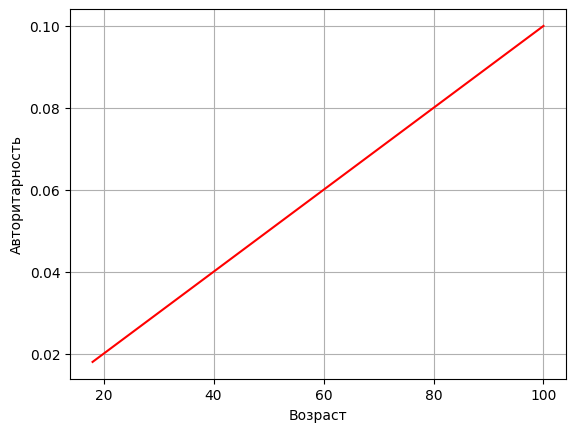

In [27]:
plt.plot(np.linspace(18,100,10),(0.0010)*(np.linspace(18,100,10)),c='r')
plt.ylabel('Авторитарность')
plt.xlabel('Возраст')
plt.grid()

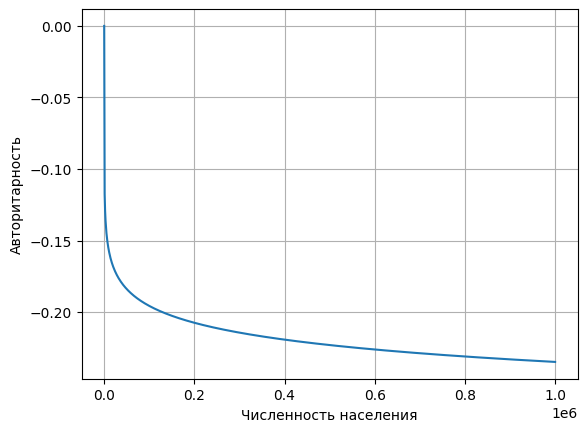

In [28]:
plt.plot(np.linspace(1,1000000,1000),(-0.0170)*np.log((np.linspace(1,1000000,1000))))
plt.ylabel('Авторитарность')
plt.xlabel('Численность населения')
plt.grid()

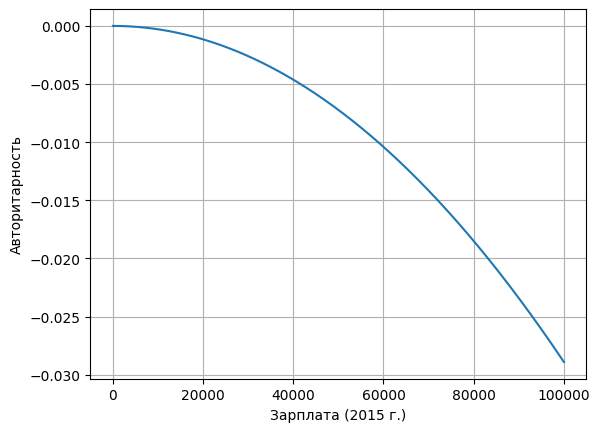

In [30]:
plt.plot(np.linspace(0,100000,1000),(-2.89e-12)*(np.linspace(0,100000,1000)**2))
plt.ylabel('Авторитарность')
plt.xlabel('Зарплата (2015 г.)')
plt.grid()

Text(0.5, 0, 'Авторитарность')

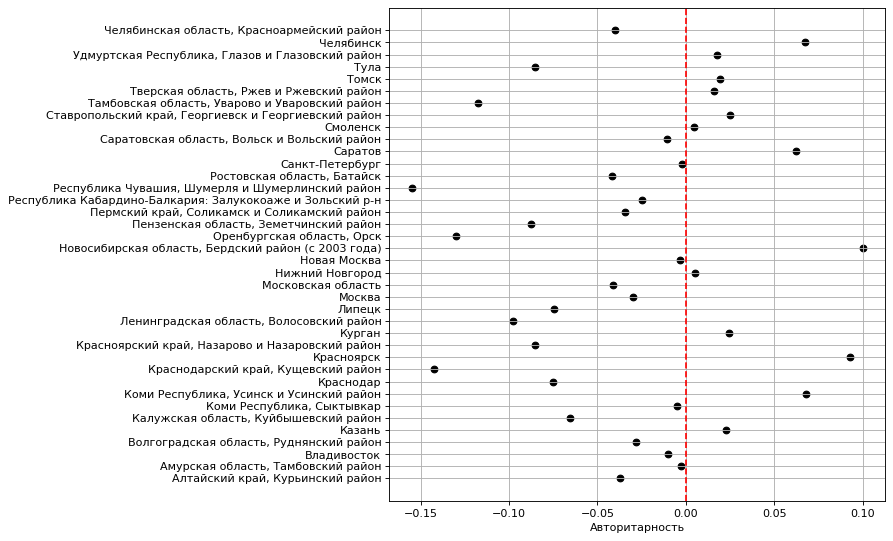

In [31]:
qqqq={}
for i in results.params.index:
    if 'C(region)' in i:
        qqqq[str(i).replace('C(region)','').replace('[','').replace(']','').replace('T.','')]=results.params[i]
        
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()
plt.scatter(pd.Series(qqqq),pd.Series(qqqq).index,c='black')
plt.axvline(0,c='r',ls='--')
plt.xlabel('Авторитарность')

Text(0.5, 0, 'Авторитарность')

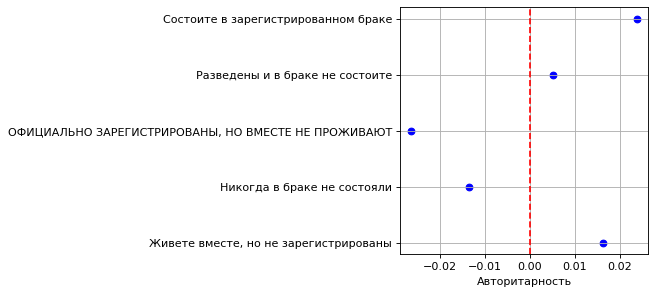

In [32]:
qqqq2={}
for i in results.params.index:
    if 'C(marst)' in i:
        qqqq2[str(i).replace('C(marst)','').replace('[','').replace(']','').replace('T.','')]=results.params[i]
        
plt.figure(figsize=(4, 4), dpi=80)
plt.grid()
plt.scatter(pd.Series(qqqq2),pd.Series(qqqq2).index,c='blue')
plt.axvline(0,c='r',ls='--')
plt.xlabel('Авторитарность')

Text(0.5, 0, 'Авторитарность')

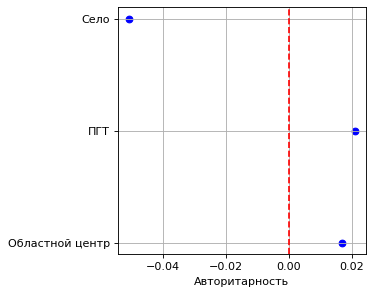

In [33]:
qqqq3={}
for i in results.params.index:
    if 'C(status)' in i:
        qqqq3[str(i).replace('C(status)','').replace('[','').replace(']','').replace('T.','')]=results.params[i]
        
plt.figure(figsize=(4, 4), dpi=80)
plt.grid()
plt.scatter(pd.Series(qqqq3),pd.Series(qqqq3).index,c='blue')
plt.axvline(0,c='r',ls='--')
plt.xlabel('Авторитарность')

<AxesSubplot: >

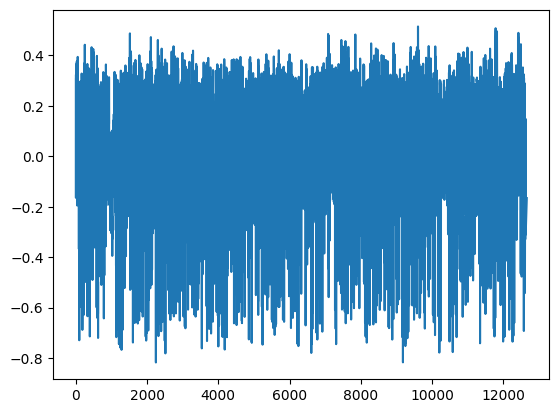

In [34]:
results.resid.plot()

# На удаление

In [ ]:
# REGION Регион 
# STATUS ТИП НАСЕЛЕННОГО ПУНКТА
# POPUL ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ
# MARST СЕМЕЙНОЕ ПОЛОЖЕНИЕ В ТЕКУЩЕЙ ВОЛНЕ 
# OCCUP08 ПРОФЕССИОНАЛЬНАЯ ГРУППА - по коду J2COD08 
# EDUC ОБРАЗОВАНИЕ (ПОДРОБНО): старше 14 лет
# DIPLOM ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА) 
# DIPLOM_1 НАИБОЛЕЕ ВЕРОЯТНОЕ ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА)

# H5 Пол респондента
# H6 Год рождения респондента (=J69.9C) 
# AGE Количество полных лет
# '''
# I - Место рождения, язык, национальность и миграция
# I1 Скажите, пожалуйста, Вы родились в другом населенном пункте или в том, где живете
# сейчас?
# I2 Скажите, пожалуйста, в какой республике бывшего СССР Вы родились? 
# I3 Скажите, пожалуйста, Вы родились в городе, поселке городского типа или в селе, деревне,
# кишлаке, ауле?
# I4 Кем Вы себя считаете по национальности? Я имею в виду не обязательно ту национальность,
# которая указана в Вашем паспорте
# I5 На каком языке в основном Вы лично говорите дома? Если Вы говорите на нескольких
# языках, уточните, какой язык Вы считаете основным
# I6 Когда Вы были ребенком, на каком языке в основном pазговаpивали у Вас дома?
# '''

In [10]:
#J67 Возможно ли, на Ваш взгляд, взаимопонимание и сотрудничество между людьми бедными и богатыми?
#J68 А что Вы думаете о возможности взаимопонимания и сотрудничества между "простыми людьми" и теми, у кого много власти?

# J69.4 Согласны или не согласны Вы с тем, что людям, которые управляют страной, все равно, что
# будет с такими, как Вы?
# J69.5 Согласны или не согласны Вы с тем, что лучше работать на частного хозяина, чем на
# государство: и порядка больше, и заработки выше?

# J69.6.5 Каким властям Вы доверяете больше, а каким меньше? 
# J69.7 Согласны или не согласны Вы с тем, что государство должно ограничить доходы богатых?

# J92 За кого Вы проголосовали в первом туре Президентских выборов?

# J103 Как Вы считаете, нам нужно все вернуть к тому, как было до Горбачева, к социализму,
# следует сохранить нынешний курс неизменным или поправить, скорректировать нынешний
# курс?
# J104 Ваше мнение о рыночной реформе? 
# J106.1 Если бы выборы Президента России состоялись сегодня, за кого бы Вы проголосовали?
# J106.2 Если бы выборы Президента России состоялись сегодня, за кого бы Вы проголосовали?
# J106.3 Если бы выборы Президента России состоялись сегодня, за кого бы Вы проголосовали? 

# J108 26 марта 2000 года состоялись выборы Президента России. Скажите, Вы участвовали в этих
# выборах?
# J109 Не могли бы Вы сказать, за кого Вы проголосовали на президентских выборах? 




# J140 За последние три года Вы участвовали в забастовках?
# J141 Приходилось ли Вам за последние три года на добровольных началах участвовать в
# деятельности какой-либо некоммерческой негосударственной организации?
# J142 Приходилось ли Вам за последние три года вносить деньги в фонд какой-либо
# некоммерческой негосударственной организации?


# J368 А как изменилась, по Вашему мнению, работа милиции в Вашем (городе/поселке/селе)? 


# # Преступность
# J329 Представьте, что Вы идете в одиночестве после наступления темноты в том районе, где Вы
# живете. Насколько безопасно Вы себя чувствуете в такой ситуации?
# J330 Как часто Вас беспокоит мысль о том, что (Ваш дом/ Вашу квартиру) могут ограбить или
# обокрасть?
# J331 Как часто Вас беспокоит мысль о том, что Вы можете стать жертвой нападения?
# J364 В течение последних 5 лет приходилось Вам сталкиваться с работой милиции, например, при
# оформлении документов, подаче заявления о краже или другом преступлении, выступая в
# роли свидетеля или подозреваемого, при разборе ДТП или в других случаях?
# J365 А приходилось Вам лично в течение последних 5 лет сталкиваться с необходимостью
# неофициально платить работникам милиции?
# J332 В течение последних 5 лет случалось так, что Вы или члены Вашей семьи становились
# жертвами грабежа, нападения или насилия
# J366.1 Что Вы предприняли после того, как пострадали от преступления? Обратились с заявлением в
# милицию?
# J366.2 Что Вы предприняли после того, как пострадали от преступления? Обратились к друзьям,
# знакомым, использовали свои личные связи?
# J366.3 Что Вы предприняли после того, как пострадали от преступления? Решали проблему
# самостоятельно?
# J366.4 Что Вы предприняли после того, как пострадали от преступления? Ничего не предпринимали?
# J367 Оцените, пожалуйста, как работает милиция в Вашем (городе/поселке/селе)? 

# # Религия
# J72.18 Каково Ваше отношение к религии? 
# J72.19 К какой религии Вы себя относите? 
# J131.1 Посещаете ли Вы религиозные службы, собрания или другие религиозные мероприятия? Если
# да, то как часто?
# J127.1 Как Вы думаете, какую религию государство должно поддерживать прежде всего?
# J127.2 Еще какую религию должно поддерживать государство?
# J127.3 Еще какую религию должно поддерживать государство?
# J128.5 Как Вы думаете, государство должно разрешить или запретить преподавание основ религии в
# школе по желанию учеников и их родителей?

# J173.1 Насколько Вы согласны или не согласны со следующими утверждениями: если человек
# считает закон несправедливым, он имеет право "обойти его"?
# J173.2 Насколько Вы согласны или не согласны со следующими утверждениями: судьи в России "продажны"?
# J173.3 Насколько Вы согласны или не согласны со следующими утверждениями: в России нельзя жить, не нарушая законы?
# J173.4 Насколько Вы согласны или не согласны со следующими утверждениями: если высшие
# государственные или политические деятели не соблюдают законы, то и простые люди могут
# не соблюдать законы?
# J174.1 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
# высокая стоимость подачи иска?
# J174.2 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
# высокая стоимость услуг юристов и адвокатов?
# J174.3 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
# необъективность судей?
# J174.4 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
# низкий профессиональный уровень судей?
# J174.5 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
# слишком долго решаются дела в суде?
# J174.6 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
# решения суда часто не выполняются?
# J176 Приходилось ли в течение последних пяти лет иметь дело с судами: 
# J402 Каким было судебное дело, когда Вы имели дело с судом? 
# J403 Какой была Ваша роль в этом судебном деле?
# J404 Какой была Ваша роль в этом судебном деле?

# J207.1 В какой степени Вы доверяете правительству Российской Федерации? 
# J207.2 В какой степени Вы доверяете Государственной Думе?
# J207.3 В какой степени Вы доверяете судам?
# J207.5 В какой степени Вы доверяете армии?
# J207.6 В какой степени Вы доверяете милиции?
# J207.7 В какой степени Вы доверяете российским банкам?
# J207.8 В какой степени Вы доверяете иностранным банкам?
# J207.9 В какой степени Вы доверяете страховым компаниям?
# J207.10 В какой степени Вы доверяете мелкому и среднему частному бизнесу? 
# J207.11 В какой степени Вы доверяете политическим партиям?

# либ ценности

# J208.1 Насколько для Вас лично важно, чтобы в нашей стране сегодня были свободные и честные
# выборы?
# J208.2 Насколько для Вас лично важно, чтобы в нашей стране сегодня были закон и порядок?
# J208.3 Насколько для Вас лично важно, чтобы в нашей стране сегодня была свобода слова? 
# J208.4 Насколько для Вас лично важно, чтобы в нашей стране сегодня была независимая пресса?
# J208.5 Насколько для Вас лично важно, чтобы в нашей стране сегодня была политическая
# оппозиция?
# J208.6 Насколько для Вас лично важно, чтобы в нашей стране сегодня были справедливые суды?
# J208.7 Насколько для Вас лично важно, чтобы в нашей стране сегодня была защита прав
# национальных, религиозных и прочих меньшинств?
# J209.1 Насколько Вы согласны или не согласны с тем, что избираемые руководители страны должны
# находиться у власти не более двух сроков подряд?
# J209.2 Насколько Вы согласны или не согласны с тем, что главы регионов - то есть губернаторы и
# президенты республик - должны назначаться, а не избираться?
# J209.3 Насколько Вы согласны или не согласны с тем, что руководство страны заботится об
# интересах таких людей, как вы, когда принимает решения?
# J209.4 Насколько Вы согласны или не согласны с тем, что руководство регионов заботится об
# интересах таких людей, как вы, когда принимает решения?

# J209.6 Насколько Вы согласны или не согласны с тем, что Россия недостаточно влияет на события,
# которые происходят в мире?
# J210 Что, по Вашему мнению, лучше всего объясняет, почему самые богатые россияне стали
# такими богатыми:
# 1. ЗАРАБОТАЛИ СВОЙ КАПИТАЛ СОБСТВЕННЫМ ТРУДОМ И ТАЛАНТОМ

# 2. СТАЛИ БОГАТЫМИ, ПОТОМУ ЧТО ИМ ПРОСТО ПОВЕЗЛО

# 3. РАЗБОГАТЕЛИ ПРИ ПОМОЩИ КРИМИНАЛЬНОЙ ДЕЯТЕЛЬНОСТИ
# 4. СТАЛИ БОГАТЫМИ БЛАГОДАРЯ СВОИМ ПОЛИТИЧЕСКИМ СВЯЗЯМ


# J211 Как Вы думаете, что нужно, чтобы сегодня стать миллионером у нас в стране?
# .01 МНОГО
# РАБОТАТЬ
# 02 ИМЕТЬ
# ХОРОШЕЕ ОБРАЗОВАНИЕ
# 03 ИМЕТЬ ТАЛАНТ
# 04 ? ИМЕТЬ
# ПОЛИТИЧЕСКИЕ СВЯЗИ
# 05 ИМЕТЬ СВЯЗИ
# В БИЗНЕСЕ

# 06 ? БЫТЬ
# СВЯЗАННЫМ С КРИМИНАЛЬНЫМИ КРУГАМИ
# 07   ЗАНИМАТЬСЯ
# КРИМИНАЛЬНОЙ ДЕЯТЕЛЬНОСТЬЮ

# J212 Всегда есть люди, которые живут беднее других. Как Вы думаете, почему именно эти люди
# сегодня беднее других?
# J213 Что в нашем обществе сегодня люди уважают больше всего? 

In [ ]:
pol_df

In [92]:
df=FAST_INDS_DFS[2015]['t_educ']

In [95]:
df[]

0        10 и более классов школы и какое-либо професс....
1                                          7 классов школы
2                      1-2 года в высшем учебном заведении
3                                          8 классов школы
4        среднее образование - есть аттестат о ср. обра...
                               ...                        
12662                                                  NaN
12663                                                  NaN
12664                                                  NaN
12665                                  техникум с дипломом
12666                                                  NaN
Name: t_educ, Length: 12667, dtype: category
Categories (26, object): ['0 классов школы', '1 класс школы', '1-2 года в высшем учебном заведении', '10 и более классов школы без аттестата о сред..., ..., 'аспирантура и т.п. с дипломом', 'есть диплом о высшем образовании', 'среднее образование - есть аттестат о ср. обр..., 'техникум с дипломом']

In [55]:
educ_dict={'0 классов школы' : 0,
'1 класс школы' : 1,
'2 класса школы' : 2,
'3 класса школы' : 3,
'4 класса школы' : 4,   
# Возможно нужна премия за каждую законченную ступень образования
'5 классов школы' : 5+1,
'6 классов школы' : 6+1,
'7 классов школы' : 7+1,
'8 классов школы' : 8+1,
'9 классов школы' : 9+1,
    
'7-9 классов школы (незак. средн) + ПТУ без диплома': 10,
'7-9 классов школы (незак. средн) + ПТУ с дипломом': 11,
'7-9 классов школы (незак. среднее) и менее 2 лет в техникуме':11,

'10 и более классов школы без аттестата о среднем образовании' : 10.5+1,
'среднее образование - есть аттестат о ср. образовании': 11+2,
'10 и более классов школы и какое-либо професс. обр. без диплома' : 11.5+2,
'10 и более классов школы и какое-либо професс. обр. с дипломом': 12.5+2,
'10 и более классов школы и техникум без диплома': 13+2,
'техникум с дипломом': 13.5+2,

'1-2 года в высшем учебном заведении': 13.5+2,
'3 и более лет в высшем учебном заведении': 15+2,
'есть диплом о высшем образовании': 16+3,
'аспирантура и т.п. без диплома': 19.5+3,
'аспирантура и т.п. с дипломом': 21+4,
    
'НЕТ ОТВЕТА': np.nan,
'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ': np.nan}

In [ ]:
J79 Сколько лет составляет Ваш общий трудовой стаж?
J10 Сколько денег в течение последних 30 дней Вы получили по основному месту работы после
вычета налогов? Если все или часть денег Вы получили в иностранной валюте, переведите,
пожалуйста, всё в рубли и назовите общую сумму

In [19]:
for i in list(FAST_INDS_DFS[2015].columns):
    print(i)

idind
tredid_i
tid_i
tid_h
sid_i
sid_h
rid_i
rid_h
qid_i
qid_h
pid_i
pid_h
oid_i
oid_h
nid_i
nid_h
mid_i
mid_h
lid_i
lid_h
kid_i
kid_h
jid_i
jid_h
iid_i
iid_h
hid_i
hid_h
gid_i
gid_h
fid_i
fid_h
eid_i
eid_h
did_i
did_h
cid_i
cid_h
bid_i
bid_h
aid_i
aid_h
region
psu
site
status
popul
t_int_y
t_origsm
t_adult
t_child
th6
t_born_m
t_age
t_occup08
t_educ
t_diplom
t_marst
t_inwgt
th3
th4
th4.1
th4.1_y
th5
th7.1
th7.2
th8a
th8b
ti1
ti3
ti3.1
ti4
ti7
ti8
tj1
tj1.1.1
tj1.1.2
tj1.1.3
tj1.1.4
tj2cod08
tj4.1
tj5a
tj5b
tj6
tj6.0
tj6.1a
tj6.1b
tj6.2
tj7
tj7.1
tj8
tj8.1
tj8.2
tj8.3
tj9
tj10
tj10.3
tj10.2
tj11
tj11.1
tj11.2
tj13
tj13.2
tj14
tj15
tj16
tj18.2
tj19
tj21a
tj21b
tj21.3
tj23
tj24
tj25
tj26
tj29
tj29c.1
tj29c.2
tj22
tj31
tj29.1
tj29.2.1
tj29.2.2
tj29.2.3
tj32
tj32.1
tj33cod08
tj35.1
tj36.1a
tj36.1b
tj36.2
tj37
tj38
tj39
tj40
tj41
tj41.1
tj41.2
tj43
tj49
tj50
tj51
tj52
tj56
tj56.11c08
tj56.12c08
tj56.13c08
tj57
tj58
tj59
tj59.1
tj60
tj60.4a1
tj60.4a2
tj60.4a3
tj604a0
tj60.4a7
tj60.4a8
tj60.4

In [51]:
FAST_INDS_DFS[2019]['xj10']

0        20000.0
1            NaN
2            NaN
3            NaN
4        18000.0
          ...   
12219        NaN
12220    29000.0
12221        NaN
12222        NaN
12223        NaN
Name: xj10, Length: 12224, dtype: category
Categories (386, object): [50.0, 57.0, 60.0, 500.0, ..., 200000.0, 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']

In [23]:
autho_dict={
'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,
'ОТКАЗ ОТ ОТВЕТА': np.nan,
'НЕТ ОТВЕТА':np.nan,
'СТАТЬ БОЛЕЕ ДЕМОКРАТИЧНОЙ':1.0,
'УСИЛИТЬ КОНТРОЛЬ НАД ПОЛИТИКОЙ': 11.0 ,
'ОСТАТЬСЯ КАК ЕСТЬ': 6.0
}

In [56]:
educ_dict

{'0 классов школы': 0,
 '1 класс школы': 1,
 '2 класса школы': 2,
 '3 класса школы': 3,
 '4 класса школы': 4,
 '5 классов школы': 6,
 '6 классов школы': 7,
 '7 классов школы': 8,
 '8 классов школы': 9,
 '9 классов школы': 10,
 '7-9 классов школы (незак. средн) + ПТУ без диплома': 10,
 '7-9 классов школы (незак. средн) + ПТУ с дипломом': 11,
 '7-9 классов школы (незак. среднее) и менее 2 лет в техникуме': 11,
 '10 и более классов школы без аттестата о среднем образовании': 11.5,
 'среднее образование - есть аттестат о ср. образовании': 13,
 '10 и более классов школы и какое-либо професс. обр. без диплома': 13.5,
 '10 и более классов школы и какое-либо професс. обр. с дипломом': 14.5,
 '10 и более классов школы и техникум без диплома': 15,
 'техникум с дипломом': 15.5,
 '1-2 года в высшем учебном заведении': 15.5,
 '3 и более лет в высшем учебном заведении': 17,
 'есть диплом о высшем образовании': 19,
 'аспирантура и т.п. без диплома': 22.5,
 'аспирантура и т.п. с дипломом': 25,
 'НЕТ О

In [57]:
work_df

,x_diplom,x_age,xj10,xh5,status,region,x_marst,popul,tj72.172
0,законченное среднее образование,64.0,20000.0,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Bдовец (вдова),11800.0,28000.0
1,незаконченное среднее образование (7 - 8 кл) +...,75.0,NaN,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Никогда в браке не состояли,11800.0,0.0
2,законченное среднее специальное образование,73.0,NaN,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,11800.0,0.0
3,незаконченное среднее образование (7 - 8 кл),65.0,NaN,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,11800.0,0.0
4,законченное среднее образование,51.0,18000.0,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,11800.0,0.0
...,...,...,...,...,...,...,...,...,...
12219,законченное среднее образование,48.0,NaN,МУЖСКОЙ,ПГТ,Московская область,Bдовец (вдова),20100.0,0.0
12220,незаконченное среднее образование (7 - 8 кл) +...,70.0,29000.0,ЖЕНСКИЙ,Город,Московская область,Состоите в зарегистрированном браке,189500.0,2000.0
12221,незаконченное среднее образование (7 - 8 кл) +...,70.0,NaN,МУЖСКОЙ,Город,Московская область,Состоите в зарегистрированном браке,189500.0,0.0
12222,законченное среднее специальное образование,68.0,NaN,ЖЕНСКИЙ,Город,Московская область,Разведены и в браке не состоите,189500.0,0.0


In [54]:
work_df=FAST_INDS_DFS[2019][['x_diplom','x_age','xj10',"xh5",'status','region','x_marst','popul']].copy(deep=1)

work_df["tj72.172"]=FAST_INDS_DFS[2015]['tj10'][FAST_INDS_DFS[2015]['tj10']!='НЕТ ОТВЕТА'][FAST_INDS_DFS[2015]['tj10']!='ОТКАЗ ОТ ОТВЕТА'][FAST_INDS_DFS[2015]['tj10']!='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']
work_df["tj72.172"]=work_df["tj72.172"].astype(str).astype(float).fillna(0)

work_df['t_diplom'].replace({'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,'НЕТ ОТВЕТА':np.nan},inplace=True)
work_df['t_marst'].replace({'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,'НЕТ ОТВЕТА':np.nan},inplace=True)
work_df['t_marst'].replace({'ОТКАЗ ОТ ОТВЕТА':np.nan},inplace=True)
work_df['tj410'].replace(autho_dict,inplace=True)
work_df['tj410']=work_df['tj410'].astype(str).astype(float)
work_df['t_age']=work_df['t_age'].astype(str).astype(float)
work_df['tj10']=FAST_INDS_DFS[2015]['tj10'][FAST_INDS_DFS[2015]['tj10']!='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ'][FAST_INDS_DFS[2015]['tj10']!='НЕТ ОТВЕТА'][FAST_INDS_DFS[2015]['tj10']!='ОТКАЗ ОТ ОТВЕТА'].astype(str).astype(float).fillna(0)
work_df_dropped=work_df.dropna()
work_df_dropped.columns=["diplom",'age','wage','autho','sex','status','region','marst','popul','child']
work_df_dropped['autho']=(work_df_dropped['autho']-1)/10

KeyError: 't_diplom'

In [25]:
work_df_dropped

,diplom,age,wage,autho,sex,status,region,marst,popul,child
0,законченное среднее образование,60.0,28000.0,1.0,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Bдовец (вдова),12200.0,28000.0
1,незаконченное среднее образование (7 - 8 кл),71.0,0.0,0.5,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Никогда в браке не состояли,12200.0,0.0
2,законченное среднее специальное образование,69.0,0.0,1.0,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,12200.0,0.0
3,незаконченное среднее образование (7 - 8 кл),61.0,0.0,1.0,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,12200.0,0.0
4,законченное среднее образование,58.0,0.0,1.0,МУЖСКОЙ,ПГТ,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,12200.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12630,законченное среднее специальное образование,24.0,3600.0,0.7,ЖЕНСКИЙ,ПГТ,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,3500.0,3600.0
12631,законченное высшее образование и выше,25.0,32800.0,1.0,МУЖСКОЙ,ПГТ,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,3500.0,32800.0
12633,законченное высшее образование и выше,50.0,70000.0,0.5,МУЖСКОЙ,Город,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,97300.0,70000.0
12634,законченное высшее образование и выше,50.0,0.0,0.5,ЖЕНСКИЙ,Город,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,97300.0,0.0


In [61]:
reg = smf.ols(formula='np.log(wage) ~ C(diplom)+age', data=work_df_dropped)
results = reg.fit()
results.summary()

C:\Users\79618\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\79618\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 27 Nov 2022   Prob (F-statistic):                nan
Time:                        01:33:15   Log-Likelihood:                    nan
No. Observations:                9169   AIC:                               nan
Df Residuals:                    9162   BIC:                               nan
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     nan        nan        nan        nan         nan         nan
C(diplom)[T.законченное среднее образование]                                  nan        nan        nan        nan         nan         nan
C(diplom)[T.законченное среднее специальное образование]                      nan        nan        nan        nan         nan         nan
C(diplom)[T.незаконченное среднее образование (7 - 8 кл)]                     nan        nan        nan        nan         nan         nan
C(diplom)[T.незаконченное среднее образование (7 - 8 кл) + что-то еще]        nan        nan        nan        nan         nan         nan
C(diplom)[T.окончил 0 - 6 классов]                                            nan        nan        nan        nan         nan         nan
age                                                                           nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         374.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""